In [39]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn import linear_model
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from path import Path
from config import db_URI

In [40]:
engine = create_engine(db_URI)

In [41]:
# Importing GDP from the database
gdp_df = pd.read_sql_query("select * from cleaned_gbp_csv" , con=engine)
print(gdp_df.shape)
gdp_df.head()

(50, 8)


column1  state_name                                    description  \
0        8     Alabama  Real GDP (millions of chained 2012 dollars)     
1       16      Alaska  Real GDP (millions of chained 2012 dollars)     
2       24     Arizona  Real GDP (millions of chained 2012 dollars)     
3       32    Arkansas  Real GDP (millions of chained 2012 dollars)     
4       40  California  Real GDP (millions of chained 2012 dollars)     

   gdp_2015  gdp_2016  gdp_2017  gdp_2018  gdp_2019  
0    189428    191523    193693    198053    200829  
1     54015     53289     52825     52928     53255  
2    281935    291259    302117    314016    323597  
3    112938    113490    114950    116698    117447  
4   2437366   2519133   2628314   2708966   2800505

In [42]:
# Drop uneccessary columns
gdp_df = gdp_df.drop(columns=['column1','description','gdp_2015'])
print(gdp_df.columns)

Index(['state_name', 'gdp_2016', 'gdp_2017', 'gdp_2018', 'gdp_2019'], dtype='object')


In [43]:
# Importing flu from the database
flu_df = pd.read_sql_query("select * from flu_percentages" , con=engine)
print(flu_df.shape)
# flu_df.head()

(51, 5)


In [44]:
# Importing uninsured rates from the database
uninsured_df = pd.read_sql_query("select * from uninsured_rates_by_state" , con=engine)
print(uninsured_df.shape)
# uninsured_df.head()

(51, 5)


In [46]:
# Importing PCI by state from the database
pci_df = pd.read_sql_query("select * from pci_by_state_cleaned_csv" , con=engine)
print(pci_df.shape)
# pci_df.head()

(51, 5)


In [48]:
# Importing population from the database
filepath = Path('Cleaned_population_density.csv')
pop_df = pd.read_csv(filepath)
print(pop_df.shape)
# pop_df.head()

(51, 5)


In [49]:
# Merging the gdp and flu % datasets
cleaned_df = pd.merge(gdp_df, flu_df, left_on="state_name", right_on="state")
print(cleaned_df.shape)
cleaned_df.head()

(50, 10)


state_name  gdp_2016  gdp_2017  gdp_2018  gdp_2019       state  \
0     Alabama    191523    193693    198053    200829     Alabama   
1      Alaska     53289     52825     52928     53255      Alaska   
2     Arizona    291259    302117    314016    323597     Arizona   
3    Arkansas    113490    114950    116698    117447    Arkansas   
4  California   2519133   2628314   2708966   2800505  California   

   2016_cases_percent  2017_cases_percent  2018_cases_percent  \
0            0.237400            0.551402            1.309394   
1            0.143367            0.446938            1.136112   
2            0.322227            0.320031            0.343307   
3            0.096424            0.174888            0.193738   
4            0.112745            0.117121            0.132161   

   2019_cases_percent  
0            1.401620  
1            1.127613  
2            0.281698  
3            0.196799  
4            0.132136

In [50]:
#Drop the state column
cleaned_df.drop(columns=['state'], inplace=True)

In [52]:
#Find null values()
for column in cleaned_df.columns:
    print(f"Column {column} has {cleaned_df[column].isnull().sum()} null values")

Column state_name has 0 null values
Column gdp_2016 has 0 null values
Column gdp_2017 has 0 null values
Column gdp_2018 has 0 null values
Column gdp_2019 has 0 null values
Column 2016_cases_percent has 0 null values
Column 2017_cases_percent has 0 null values
Column 2018_cases_percent has 0 null values
Column 2019_cases_percent has 0 null values


In [53]:
#Find duplicates entries
print(f"Duplicates entries: {cleaned_df.duplicated().sum()}")

Duplicates entries: 0


In [54]:
# Find dtypes of each df
cleaned_df.dtypes

state_name             object
gdp_2016                int64
gdp_2017                int64
gdp_2018                int64
gdp_2019                int64
2016_cases_percent    float64
2017_cases_percent    float64
2018_cases_percent    float64
2019_cases_percent    float64
dtype: object

In [55]:
# Creating the correlation matrix
cleaned_df.corr()

gdp_2016  gdp_2017  gdp_2018  gdp_2019  \
gdp_2016            1.000000  0.999888  0.999769  0.999534   
gdp_2017            0.999888  1.000000  0.999953  0.999849   
gdp_2018            0.999769  0.999953  1.000000  0.999947   
gdp_2019            0.999534  0.999849  0.999947  1.000000   
2016_cases_percent -0.125531 -0.125382 -0.125941 -0.125819   
2017_cases_percent -0.135569 -0.135921 -0.136718 -0.136916   
2018_cases_percent -0.175386 -0.175361 -0.175999 -0.175550   
2019_cases_percent -0.194326 -0.193764 -0.194103 -0.193441   

                    2016_cases_percent  2017_cases_percent  \
gdp_2016                     -0.125531           -0.135569   
gdp_2017                     -0.125382           -0.135921   
gdp_2018                     -0.125941           -0.136718   
gdp_2019                     -0.125819           -0.136916   
2016_cases_percent            1.000000            0.907115   
2017_cases_percent            0.907115            1.000000   
2018_cases_percent            0.786951            0.885267   
2019_cases_percent            0.734176            0.827731   

                    2018_cases_percent  2019_cases_percent  
gdp_2016                     -0.175386           -0.194326  
gdp_2017                     -0.175361           -0.193764  
gdp_2018                     -0.175999           -0.194103  
gdp_2019                     -0.175550           -0.193441  
2016_cases_percent            0.786951            0.734176  
2017_cases_percent            0.885267            0.827731  
2018_cases_percent            1.000000            0.915566  
2019_cases_percent            0.915566            1.000000

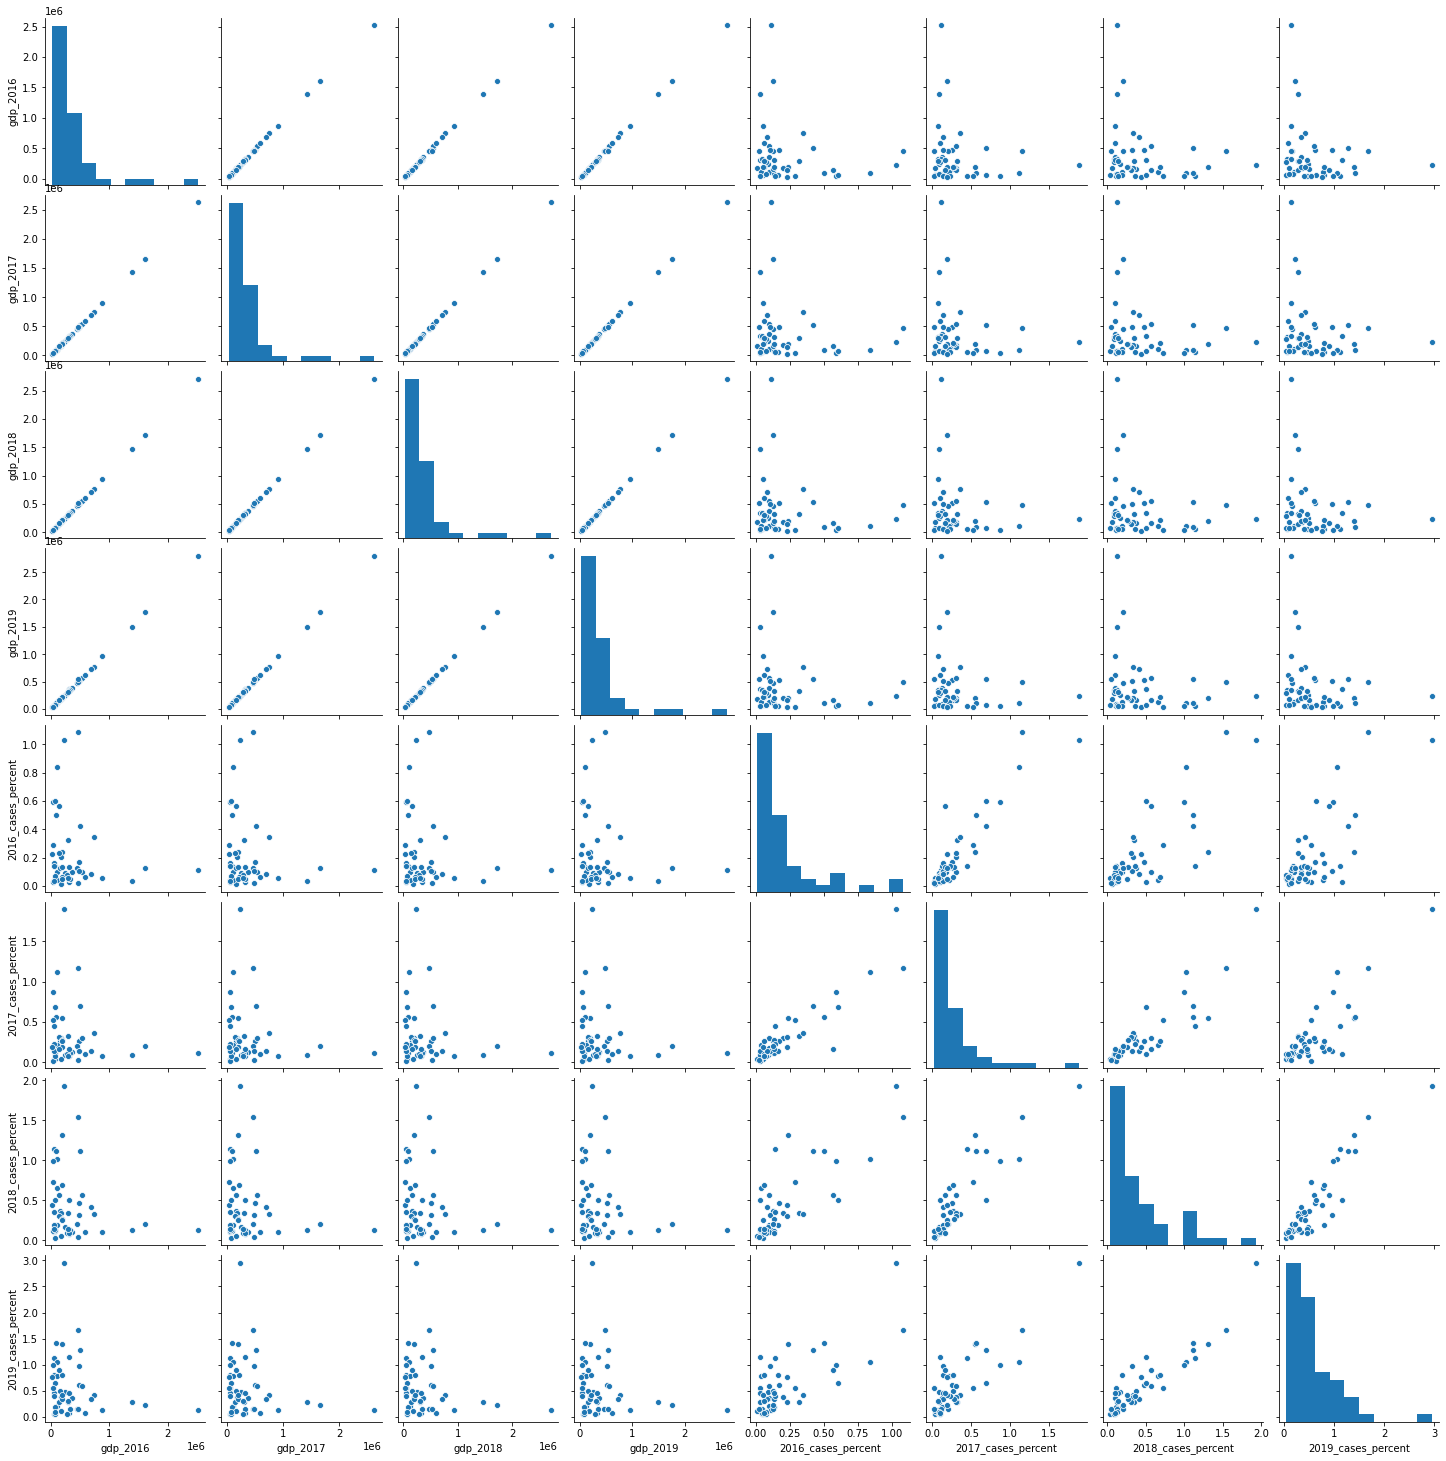

In [56]:
# Displaying the visual representation of the Correlation Matrix using Seaborn and Matplotlib
sns.pairplot(cleaned_df)